In [39]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import quote
import time
from sklearn import preprocessing
import matplotlib as plt

In [40]:
# df = pd.read_csv('Orders.csv',header = 0,sep = ",")

In [41]:
# df

In [42]:
# df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [43]:
# data2=df[['City','Quantity','new_DateId']]

In [44]:
# data2.to_csv("data2.csv")

In [45]:
data2=pd.read_csv('data2.csv',header = 0,sep = ",")

In [46]:
data3=data2[data2['City']=='桃園市']

In [47]:
data4=data3.groupby(by='new_DateId')['Quantity'].sum()

In [48]:
data4

new_DateId
2015-05-07       5
2015-05-08      13
2015-05-09       1
2015-05-10       6
2015-05-11       9
2015-05-12       9
2015-05-13       2
2015-05-14      12
2015-05-15       5
2015-05-16      10
2015-05-17      11
2015-05-18      21
2015-05-19      32
2015-05-20      11
2015-05-21       7
2015-05-22      26
2015-05-23      55
2015-05-24      27
2015-05-25      52
2015-05-26      12
2015-05-27       2
2015-05-28      12
2015-05-29      36
2015-05-30      48
2015-05-31      37
2015-06-01      52
2015-06-02      37
2015-06-03      58
2015-06-04      32
2015-06-05      55
              ... 
2017-04-25     869
2017-04-26     816
2017-04-27     727
2017-04-28     802
2017-04-29     897
2017-04-30     941
2017-05-01     954
2017-05-02     829
2017-05-03     926
2017-05-04     898
2017-05-05     837
2017-05-06     970
2017-05-07    1074
2017-05-08     793
2017-05-09     795
2017-05-10     807
2017-05-11     675
2017-05-12     160
2017-05-13     652
2017-05-14     838
2017-05-15      98
2

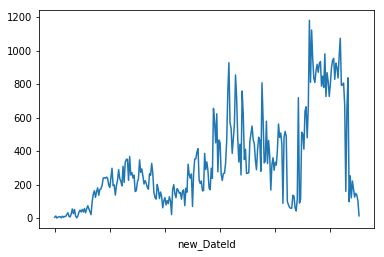

In [49]:
%matplotlib inline
data4.plot()

In [50]:
#####

In [51]:
station_info = pd.read_csv('station_info.csv')

In [52]:
station_info.drop('Unnamed: 0',axis = 1,inplace=True)   #axis:去行（0）或列（1）

In [53]:
station_info

,466880,466900,466910,466920,466930,466940,466950,466990,467050,467060,...,C1V600,C1V780,C1X040,C1Z030,C1Z040,C1Z110,C1Z120,C1Z130,C1Z140,C1Z240
0,板橋,淡水,鞍部,臺北,竹子湖,基隆,彭佳嶼,花蓮,新屋,蘇澳,...,藤枝,多納林道,東原,紅葉,立山,三棧,壽豐,銅門,荖溪,中平林道
1,BANQIAO,TAMSUI,ANBU,TAIPEI,ZHUZIHU,KEELUNG,PENGJIAYU,HUALIEN,XINWU,SU-AO,...,Tengzhi,Duonalindao,Dongyuan,Hongye,Lishan,Sanzhan,Shoufeng,Tongmen,Laoxi,Zhongpinglindao
2,新北市,新北市,臺北市,臺北市,臺北市,基隆市,基隆市,花蓮縣,桃園市,宜蘭縣,...,高雄市,高雄市,臺南市,花蓮縣,花蓮縣,花蓮縣,花蓮縣,花蓮縣,花蓮縣,花蓮縣
3,%25E6%259D%25BF%25E6%25A9%258B,%25E6%25B7%25A1%25E6%25B0%25B4,%25E9%259E%258D%25E9%2583%25A8,%25E8%2587%25BA%25E5%258C%2597,%25E7%25AB%25B9%25E5%25AD%2590%25E6%25B9%2596,%25E5%259F%25BA%25E9%259A%2586,%25E5%25BD%25AD%25E4%25BD%25B3%25E5%25B6%25BC,%25E8%258A%25B1%25E8%2593%25AE,%25E6%2596%25B0%25E5%25B1%258B,%25E8%2598%2587%25E6%25BE%25B3,...,%25E8%2597%25A4%25E6%259E%259D,%25E5%25A4%259A%25E7%25B4%258D%25E6%259E%2597%...,%25E6%259D%25B1%25E5%258E%259F,%25E7%25B4%2585%25E8%2591%2589,%25E7%25AB%258B%25E5%25B1%25B1,%25E4%25B8%2589%25E6%25A3%25A7,%25E5%25A3%25BD%25E8%25B1%2590,%25E9%258A%2585%25E9%2596%2580,%25E8%258D%2596%25E6%25BA%25AA,%25E4%25B8%25AD%25E5%25B9%25B3%25E6%259E%2597%...
4,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...


In [54]:
stationIndexList = station_info.columns

In [55]:
def getClimate(site,date,mode):
    
    precpAvgList = list()
    tempAvgList = list()
    
    #台-->臺
    if site[0] == '台':
        site = '臺'+site[1:] #字串無法直接指定, ex:site[k] = '臺'
            
    if mode == 1: 
        for i in range(len(stationIndexList)):       
            
            #此地區每個測站
            if station_info[stationIndexList[i]][2] == site:
                
                #需要delay才不會被擋
                time.sleep(0.11) 
                
                #去指定網址爬取
#                 print(station_info[stationIndexList[i]][4] + date) #網址
                temp=pd.read_html(station_info[stationIndexList[i]][4] + date)
                
                 #此測站24小時的資料
                for j in range(len(temp[1][10][2:])):
                    
                    #清空
                    precpList = list()
                    tempList = list() 
                    
                    #讀取，若是X則跳過
                    try:
                        precpList.append(np.float(temp[1][10][j+2]))
                        tempList.append(np.float(temp[1][3][j+2]))
                    except:
                        continue
                        
                    #求得此測站平均
                    precpAvg = np.average(precpList)
                    tempAvg = np.average(tempList)
                    
                #此地區所有測站值
                if precpAvg == precpAvg:  #確認是否為nan
                    precpAvgList.append(precpAvg)
                if tempAvg == tempAvg:
                    tempAvgList.append(tempAvg)
                    
        #算出所有測站平均回傳 
#         print(precpAvgList)
#         print(tempAvgList)
        
        return np.average(precpAvgList), np.average(tempAvgList)
    
    else:
        for i in range(len(stationIndexList)):
            
            #此地區每個人工測站
            if (station_info[stationIndexList[i]][2] == site) and stationIndexList[i].isdigit():
                
                #去指定網址爬取
#                 print(station_info[stationIndexList[i]][4] + date) #網址
                temp=pd.read_html(station_info[stationIndexList[i]][4] + date)
    
                 #此測站24小時的資料
                for j in range(len(temp[1][10][2:])):
                    #清空
                    precpList = list()
                    tempList = list() 
                    
                    #讀取，若是X則跳過
                    try:
                        precpList.append(np.float(temp[1][10][j+2]))
                        tempList.append(np.float(temp[1][3][j+2]))
                    except:
                        continue
                        
                    #求得此測站平均
                    precpAvg = np.average(precpList)
                    tempAvg = np.average(tempList)
                
                #此地區所有測站值
                if precpAvg == precpAvg:  #確認是否為nan
                    precpAvgList.append(precpAvg)
                if tempAvg == tempAvg:
                    tempAvgList.append(tempAvg)
#             else:
#                 break
        #算出人工測站平均回傳    
#         print(precpAvgList)
#         print(tempAvgList)
        return np.average(precpAvgList), np.average(tempAvgList)

In [56]:
data33=data2[data2['City']=='桃園市']

In [57]:
data44=data3.groupby(by='new_DateId')['Quantity'].sum()

In [58]:
# k=list()
# for i in data44.index:
#     i=str(i)
#     ii=i.replace(" 00:00:00","")
#     k.append(getClimate('桃園市',ii,1))
# print(k)


    

In [59]:
eee = pd.read_csv('qq3.csv',header = 0,sep = ",")

In [60]:
eee

,Unnamed: 0,water,tem
0,0,0.000000,22.218182
1,1,0.000000,23.590909
2,2,0.000000,22.109091
3,3,0.000000,23.827273
4,4,0.041667,24.563636
5,5,0.000000,20.827273
6,6,0.000000,24.236364
7,7,0.000000,25.045455
8,8,0.000000,25.745455
9,9,0.000000,25.709091


In [61]:
# eee=pd.DataFrame(k)

In [62]:
# eeee=pd.DataFrame({'water':eee[0],'tem':eee[1]})

In [63]:
# eeee

In [64]:
# eeee.to_csv('qq3.csv')

In [65]:
# fd=df[['new_DateId','City','SalesOrderSlaveTotalPayment']]
# fd

In [66]:
# fd.to_csv("fd.csv")

In [67]:
fd2=pd.read_csv("fd2.csv")

In [68]:
# fd2.to_csv("fd2.csv")

In [69]:
# fd2=fd[fd['City']=='桃園市']
fd2

,Unnamed: 0,Unnamed: 0.1,new_DateId,City,SalesOrderSlaveTotalPayment
0,4,4,2015-07-03,桃園市,100.0
1,5,5,2015-07-03,桃園市,188.0
2,6,6,2015-07-03,桃園市,199.0
3,7,7,2015-07-03,桃園市,99.0
4,64,64,2015-07-03,桃園市,177.0
5,65,65,2015-07-03,桃園市,122.0
6,66,66,2015-07-03,桃園市,240.0
7,115,115,2015-07-03,桃園市,149.0
8,116,116,2015-07-03,桃園市,150.0
9,117,117,2015-07-03,桃園市,299.0


In [70]:
fd3=fd2.groupby(by='new_DateId')['SalesOrderSlaveTotalPayment'].sum()
fd3

new_DateId
2015-05-07      1016.0
2015-05-08      3277.0
2015-05-09       220.0
2015-05-10      1327.0
2015-05-11      2519.0
2015-05-12      2202.0
2015-05-13       398.0
2015-05-14      2774.0
2015-05-15      1094.0
2015-05-16      2216.0
2015-05-17      2291.0
2015-05-18      4940.0
2015-05-19      6153.0
2015-05-20      2454.0
2015-05-21      1290.0
2015-05-22      5638.0
2015-05-23     11106.0
2015-05-24      5411.0
2015-05-25     11051.0
2015-05-26      2431.0
2015-05-27       455.0
2015-05-28      2978.0
2015-05-29      8046.0
2015-05-30      8998.0
2015-05-31      7819.0
2015-06-01     11171.0
2015-06-02      7974.0
2015-06-03     12854.0
2015-06-04      6156.0
2015-06-05     11301.0
                ...   
2018-03-17    155146.0
2018-03-18    166691.0
2018-03-19    157969.0
2018-03-20    156482.0
2018-03-21    119811.0
2018-03-22    116556.0
2018-03-23     93207.0
2018-03-24    119102.0
2018-03-25    131258.0
2018-03-26    140947.0
2018-03-27    148972.0
2018-03-28    131995.0


In [71]:
s1=fd3.index
s2=fd3.values


In [72]:
s1

Index(['2015-05-07', '2015-05-08', '2015-05-09', '2015-05-10', '2015-05-11',
       '2015-05-12', '2015-05-13', '2015-05-14', '2015-05-15', '2015-05-16',
       ...
       '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10',
       '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15'],
      dtype='object', name='new_DateId', length=1075)

In [73]:
s2

array([  1016.,   3277.,    220., ..., 115783., 171098., 134812.])

In [74]:
dd=pd.DataFrame({'new_DateId':s1,'City':'桃園市','SalesOrderSlaveTotalPayment':s2,'water':eee['water'],'temp':eee['tem']})

In [75]:
dd

,new_DateId,City,SalesOrderSlaveTotalPayment,water,temp
0,2015-05-07,桃園市,1016.0,0.000000,22.218182
1,2015-05-08,桃園市,3277.0,0.000000,23.590909
2,2015-05-09,桃園市,220.0,0.000000,22.109091
3,2015-05-10,桃園市,1327.0,0.000000,23.827273
4,2015-05-11,桃園市,2519.0,0.041667,24.563636
5,2015-05-12,桃園市,2202.0,0.000000,20.827273
6,2015-05-13,桃園市,398.0,0.000000,24.236364
7,2015-05-14,桃園市,2774.0,0.000000,25.045455
8,2015-05-15,桃園市,1094.0,0.000000,25.745455
9,2015-05-16,桃園市,2216.0,0.000000,25.709091


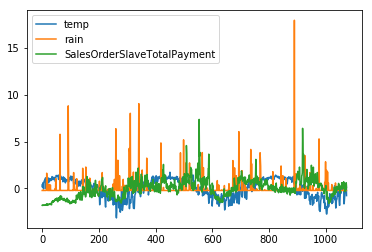

In [76]:
%matplotlib inline
a=list(preprocessing.scale(dd['temp']))
b=list(preprocessing.scale(dd['water']))
c=list(preprocessing.scale(dd['SalesOrderSlaveTotalPayment']))
dfff=pd.DataFrame({"temp":a,"rain":b,"SalesOrderSlaveTotalPayment":c})
dfff.plot()
#桃園市